In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

import mygrad as mg
from mygrad.nnet.initializers import uniform


mg.turn_memory_guarding_off()  # will help parts of this notebook run faster

# Activation Functions

In our work with the universal function approximation theorem and, subsequently, neural networks, we will frequently be making use of a family of non-linear functions, which are known as activation functions: $\varphi(x)$
The non-linearity of these functions are specifically meant to have an "on/off" shape to them; that is, the function should return $0$ ("off") across a wide domain of inputs, and a non-zero ("on") for all other inputs.

Lastly, these non-linear functions are typically designed to be monotonic, meaning that they never "reverse direction" as we increase $x$.
That is, as we increase $x$, once the function "turns on", it will never turn off. Or, once the function turns off, it will never turn back on.

## The Sigmoid Function

A textbook example of an activation function that has this "on/off" shape is the sigmoid function:

\begin{equation}
\varphi(x) = \frac{1}{1 + e^{-x}}
\end{equation}

Let's plot this function.

### Plotting our "activation function"

Here we will import the `sigmoid` from `mygrad.nnet.activations`. Plot this function on the domain $[-10, 10]$.

Note that `sigmoid` is designed to be a vectorized function just like NumPy's functions. I.e. you can feed it an array of values, and it will return an array of corresponding outputs:

```python
>>> x = np.array([-1, 0, 1])
>>> sigmoid(x)  # sigmoid is vectorized
Tensor([0.26894142, 0.5       , 0.73105858])
```


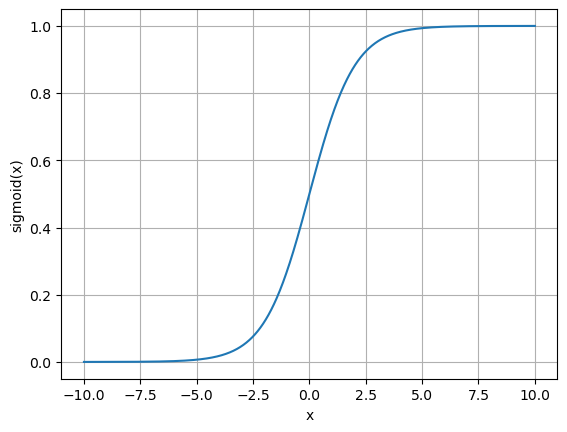

In [3]:
from mygrad.nnet.activations import sigmoid

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 1000) # use np.linspace to create 1,000 evenly-spaced points between [-10, 10]

y = sigmoid(x) # evaluate the sigmoid function for all `x` values. 

ax.plot(x, y)

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("sigmoid(x)");

You should see that the sigmoid has the aforementioned monotonic "on/off" pattern to it:
for increasingly-negative $x$, $\varphi(x) \rightarrow 0$ (off), and for increasingly-positive $x$, $\varphi(x) \rightarrow 1$ (on).
Furthermore, as $x$ moves from negative to positive values, the activation increases without ever decreasing, thus it is monotonic.

## The ReLU function

Another popular – and much more frequently used – activation function is the "rectified linear unit", or ReLU function.

\begin{equation}
\mathrm{relu}(x) = \begin{cases} 
      0 & x\leq 0 \\
      x & 0 < x
\end{cases}
\end{equation}

Import the `relu` function from mygrad via: `from mygrad.nnet.activations import relu`, and plot this function.

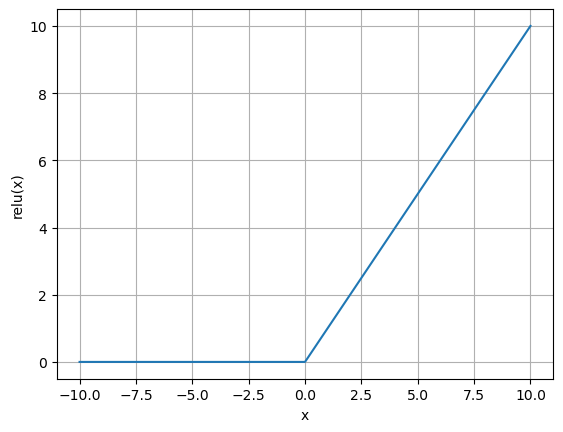

In [4]:
from mygrad.nnet.activations import relu

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 1000) # use np.linspace to create 1,000 evenly-spaced points between [-10, 10]

y = relu(x) # evaluate the relu function for all `x` values. 

ax.plot(x, y)

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("relu(x)");

Check your understanding of the qualities that we are looking for in an activation function: is this a non-linear, monotonic function with the desired "on/off" pattern? 

## "Steering" an activation function

Thus far, we have learned about the basic shapes/qualities that we are looking for in an activation function, but we haven't seen why these are actually useful. What is the point of these "on/off" patterns, and how do these activation functions help us create flexible mathematical models?

To help answer these questions, it is essential to recognize that we will actually be using *parameterized* activation functions

\begin{equation}
\varphi(w, b; x)
\end{equation}

whose parameters $w$ and $b$ can be tuned to modify the shape and orientation of the activation function.
These parameters are essential to the utility of these activation functions; $w$ and $b$ **enables an activation function to behave like a neuron**, where it can learn to selective send signals (i.e. "turn on") for some values of $x$ and to remain "off" for other values of $x$.

It is very often the case – and will always be the case in this course – that $w$ and $b$ serve as a linear weight and bias, respectively, on $x$.
That is, our activation function will  have the particular form:

\begin{equation}
\varphi(w, b; x) = \varphi(x \cdot w + b)
\end{equation}

It is important to recognize that $x$ is an independent input to $\varphi(w, b; x)$, whereas $w$ and $b$ are trainable/learnable/tunable parameters for the activation function.
When we eventually create a mathematical model out of many of these activation functions (a **network** of these neurons!), the model's trainable parameters will consist of the $w$ and $b$ parameters for each of its activations functions.


Running the following cell will create an interactive plot of $\varphi(x \cdot w + b)$, where $\varphi$ is the sigmoid function.
Use the sliders to adjust the values of $w$ and $b$, to develop an intuition how these parameters can be used to modify the activation function.
Answer the following questions:
- Which parameter can be used to change *where* the activation function turns from "off" to "on"?
- Which parameter affects the actual shape of the sigmoid curve; e.g. changes how steep the sigmoid is?
- Can either of these parameters be used to flip the activation function's on/off pattern? That is, can you create an activation function that goes from "on" to "off", instead of from "off" to "on"?

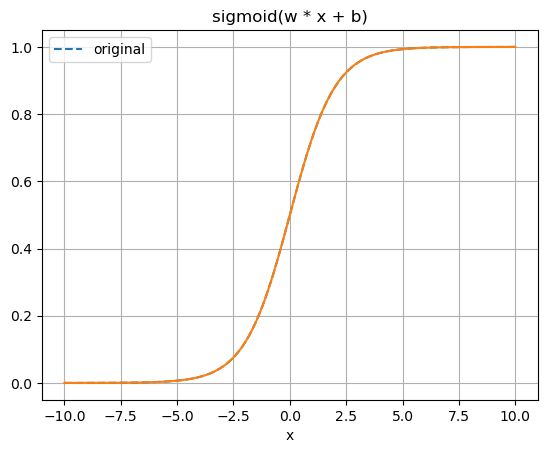

interactive(children=(FloatSlider(value=1.0, description='w', max=5.0, min=-5.0, step=0.2), FloatSlider(value=…

In [7]:
# Run this cell and experiment with the plot sliders

import ipywidgets as widgets
from ipywidgets import interact

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 1000)

w = 1.0
b = 0.0


def param_sigmoid(x, w=1.0, b=0.0):
    return sigmoid(w * x + b)


ax.plot(x, param_sigmoid(x), ls="--", label="original")
(line,) = ax.plot(x, param_sigmoid(x, w=w, b=b))
ax.grid()
ax.legend()
ax.set_title(f"sigmoid(w * x + b)")
ax.set_xlabel("x")


@interact(
    b=widgets.FloatSlider(min=-5, max=5, step=0.3, value=0),
    w=widgets.FloatSlider(min=-5, max=5, step=0.2, value=1),
)
def update(w=1.0, b=0.0):
    line.set_ydata(param_sigmoid(x, w=w, b=b))
    fig.canvas.draw_idle()

Let's repeat this analysis for $\mathrm{relu}(x \cdot w + b)$

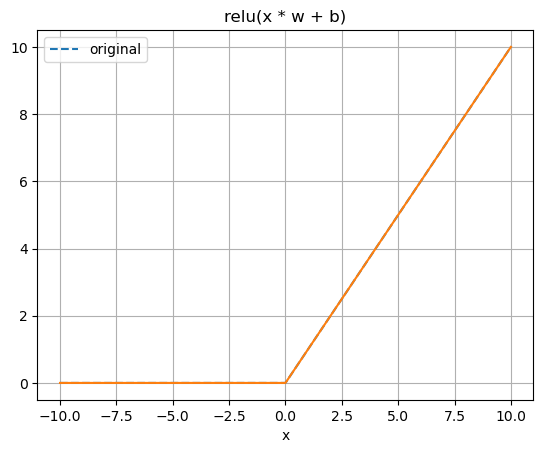

interactive(children=(FloatSlider(value=1.0, description='w', max=5.0, min=-5.0, step=0.2), FloatSlider(value=…

In [8]:
# Run this cell and experiment with the plot sliders

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 1000)

w = 1.0
b = 0.0


def param_relu(x, w=1.0, b=0.0):
    return relu(x * w + b)


ax.plot(x, param_relu(x), ls="--", label="original")
(line,) = ax.plot(x, param_relu(x, w=w, b=b))
ax.grid()
ax.legend()
ax.set_title("relu(x * w + b)")
ax.set_xlabel("x")

@interact(
    b=widgets.FloatSlider(min=-5, max=5, step=0.3, value=0),
    w=widgets.FloatSlider(min=-5, max=5, step=0.2, value=1),
)
def update(w=1.0, b=0.0):
    line.set_ydata(param_relu(x, w=w, b=b))
    fig.canvas.draw_idle()

## Randomly generated "function approximators"

We will soon be introduced to the universal function approximation theorem, which has us construct an approximating function $F$ that is the sum of $N$ parameterized activation functions (a.k.a **neurons**), each one scaled by an additional learnable parameter $v_i$:

\begin{equation}
F(\{v_i\}_{i=1}^{N}, \{w_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}; x) = \sum_{i=1}^{N} v_{i}\varphi(x \cdot w_{i} + b_{i})
\end{equation}

The idea here is that, given a large enough number of **neurons**, $N$, with the appropriately-tuned parameters $\{v_i\}_{i=1}^{N}, \{\vec{w}_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}$, we can make $F(\{v_i\}_{i=1}^{N}, \{\vec{w}_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}; x)$ adopt whatever shape we'd like (as long as that shape is continuous, smooth, and bounded).

To develop an intuition for this, let's plot forms of $F$ where we have *drawn random values for* $\{v_i\}_{i=1}^{N}, \{\vec{w}_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}$.
We will see that the resulting plot of $F(x)$ should be able to display some strikingly-diverse shapes.

In the following cell, pick a value for `num_neurons` (which represents $N$) and execute the cell to plot the randomly-arranged function $F$.
Try running the cell multiple times to see the various forms of $F$ that can manifest for that value of `num_neurons`.
Also try increasing the value of `num_neurons`; you should see that $F$ can take on increasingly-complicated shapes as you increase that value.

Each grey dashed curve corresponds to one of the scaled neurons, $v_{i}\varphi(x \cdot w_{i} + b_{i})$.
The solid blue curve is their sum, $F(x)$.

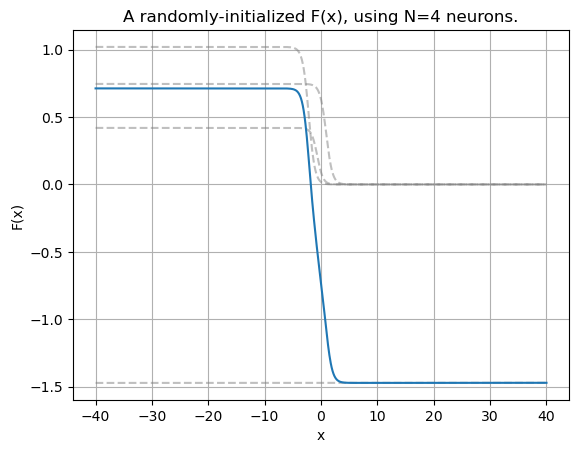

In [63]:
# Run this a bunch of times to see different combinations of neurons

num_neurons = 4  # try adjusting this number

fig, ax = plt.subplots()


xlim = min(100, num_neurons * 10)

x = np.linspace(-xlim, xlim, 1000)


w = uniform(num_neurons, lower_bound=-1, upper_bound=1) * 2
b = uniform(num_neurons, lower_bound=-1, upper_bound=1) * 10
v = uniform(num_neurons, lower_bound=-1, upper_bound=1) * 2

out = 0.0

with mg.no_autodiff:
    for i in range(num_neurons):
        y = v[i] * param_sigmoid(x, w=w[i], b=b[i])
        ax.plot(x, y, ls="--", c="gray", alpha=0.5)
        out += y


ax.plot(x, out)
ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"A randomly-initialized F(x), using N={num_neurons} neurons.")
ax.grid()

## Summary and looking ahead

We were introduced to the **activation functions** sigmoid and ReLU (rectified linear unit).
What these, and other activation functions ($\varphi$), have in common is that they are **monotonic non-linear functions, with clear "on"/"off patterns**.
A parameterized activation function $\varphi(w, b; x)$ is what we refer to as a **neuron** in the parlance of neural networks and deep learning. The learnable parameters $w$ and $b$ determine which values of $x$ will cause the neuron $\varphi(w, b; x)$ to "activate" (or, "turn on").

It is most often the case that $w$ and $b$ represent a linear scale and bias on $x$: $\varphi(w, b; x) = \varphi(x \cdot w + b)$. 
The interactive plots in this notebook gave us a feel for how $w$ and $b$ can "steer" the shape of a neuron's activation pattern. At last, we saw that summing $N$ neurons with randomly-drawn parameters (in addition to activation-scaling parameters $v_i$), can produce highly-diverse shapes. 
Indeed, this is the foundation for creating a so-called universal function approximator, $F(\{v_i\}_{i=1}^{N}, \{w_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}; x)$, which can take on any shape that we'd like, as long as we have a large enough value for $N$ *and* as long as we can find the appropriate values for $\{v_i\}_{i=1}^{N}, \{w_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}$...

Suppose we want $F(x)$ to resemble the cosine function on $[-2 \pi, 2\pi]$, how *do* we find values $\{v_i\}_{i=1}^{N}, \{w_i\}_{i=1}^{N}, \{b_i\}_{i=1}^{N}$ to achieve this?
We'll use gradient descent, which is the technique that we previously used to iteratively our linear model!
In fact, we'll solve this exact problem in the next notebook, which is all about fitting a universal function approximator.